In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_insights as mli


# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
datafile = "data/Ames_Housing_Data.tsv"

In [3]:
df=pd.read_csv(datafile, sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
#X=df.loc[:,['MS SubClass','Lot Area','Overall Qual',
##       'Overall Cond', 'Year Built', 'Year Remod/Add','BsmtFin SF 1',
#    'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','1st Flr SF',
#       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
#       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
#       'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area','Pool Area']]
X=df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Half Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars', 'Garage Area','Pool Area']]




y=df['SalePrice']

In [7]:
#X['garbage']=np.random.uniform(size =19648)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
Lot Area          2930 non-null int64
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Gr Liv Area       2930 non-null int64
Full Bath         2930 non-null int64
Half Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Fireplaces        2930 non-null int64
Garage Cars       2929 non-null float64
Garage Area       2929 non-null float64
Pool Area         2930 non-null int64
dtypes: float64(2), int64(11)
memory usage: 297.7 KB


In [9]:
X = X.fillna(0)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
Lot Area          2930 non-null int64
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Gr Liv Area       2930 non-null int64
Full Bath         2930 non-null int64
Half Bath         2930 non-null int64
Bedroom AbvGr     2930 non-null int64
Fireplaces        2930 non-null int64
Garage Cars       2930 non-null float64
Garage Area       2930 non-null float64
Pool Area         2930 non-null int64
dtypes: float64(2), int64(11)
memory usage: 297.7 KB


In [29]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [31]:
gbmodel1 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .005,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.005,
             loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

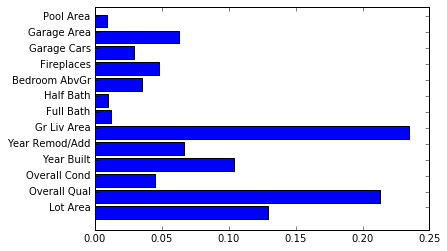

In [32]:
fig, ax = plt.subplots()

ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_)
ax.set_yticks(ind + .7)
ax.set_yticklabels((X_test.columns))


In [33]:
results = mli.insights.model_xray(gbmodel1, X_test)


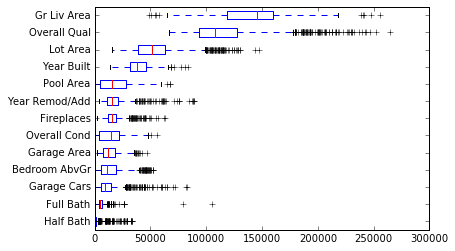

In [34]:
mli.insights.feature_effect_summary(results)

array([105,  85, 307, 529, 538, 342, 697, 550, 205, 531])

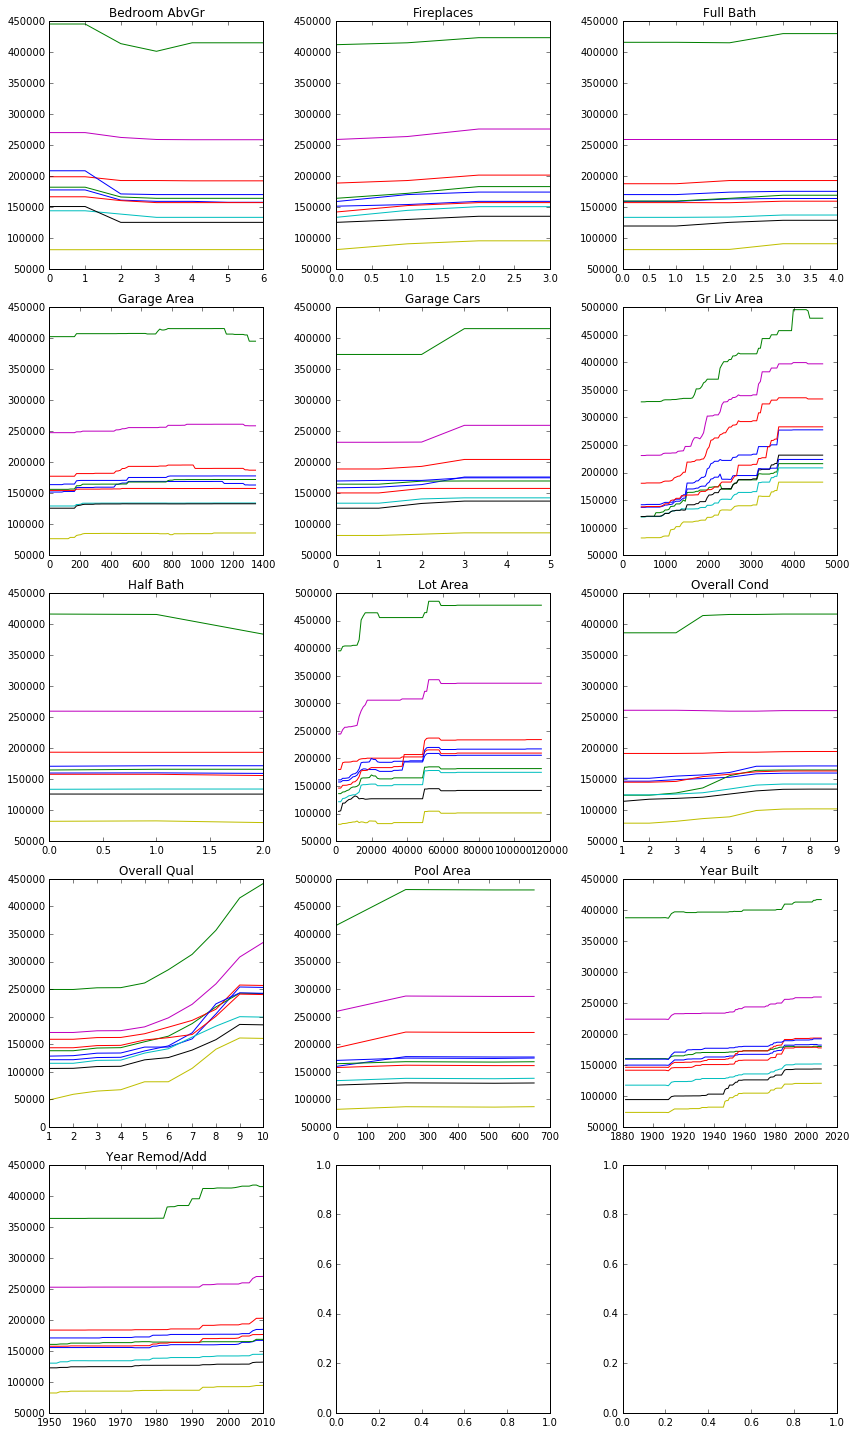

In [35]:
mli.insights.feature_dependence_plots(results, num_pts=10)

In [36]:
y_class = (y>250000).astype(int)

In [37]:
np.mean(y_class)

0.15187713310580206

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3,
                                                    random_state=42)

In [39]:
gbmodel2 = GradientBoostingClassifier(n_estimators = 1000, 
                                     learning_rate = .005,
                                    max_depth = 7)
gbmodel2.fit(X_train,y_train)
pred_vals_gb2 = gbmodel2.predict_proba(X_test)

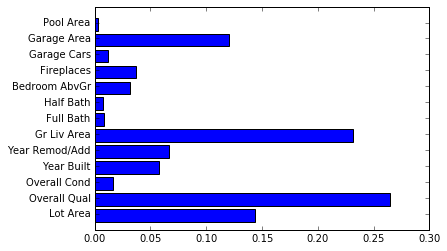

In [40]:
fig, ax = plt.subplots()

ind = np.array(range(len(X.columns)))+.5
plt.barh(ind,gbmodel2.feature_importances_)
ax.set_yticks(ind + .5)
ax.set_yticklabels((X_test.columns))



In [42]:
results = mli.insights.model_xray(gbmodel2, X_test,is_classification=True)

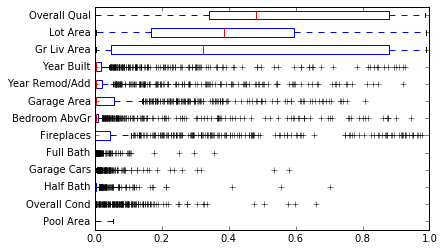

In [43]:
mli.insights.feature_effect_summary(results)

array([233, 366, 130, 148, 669, 203,  28])

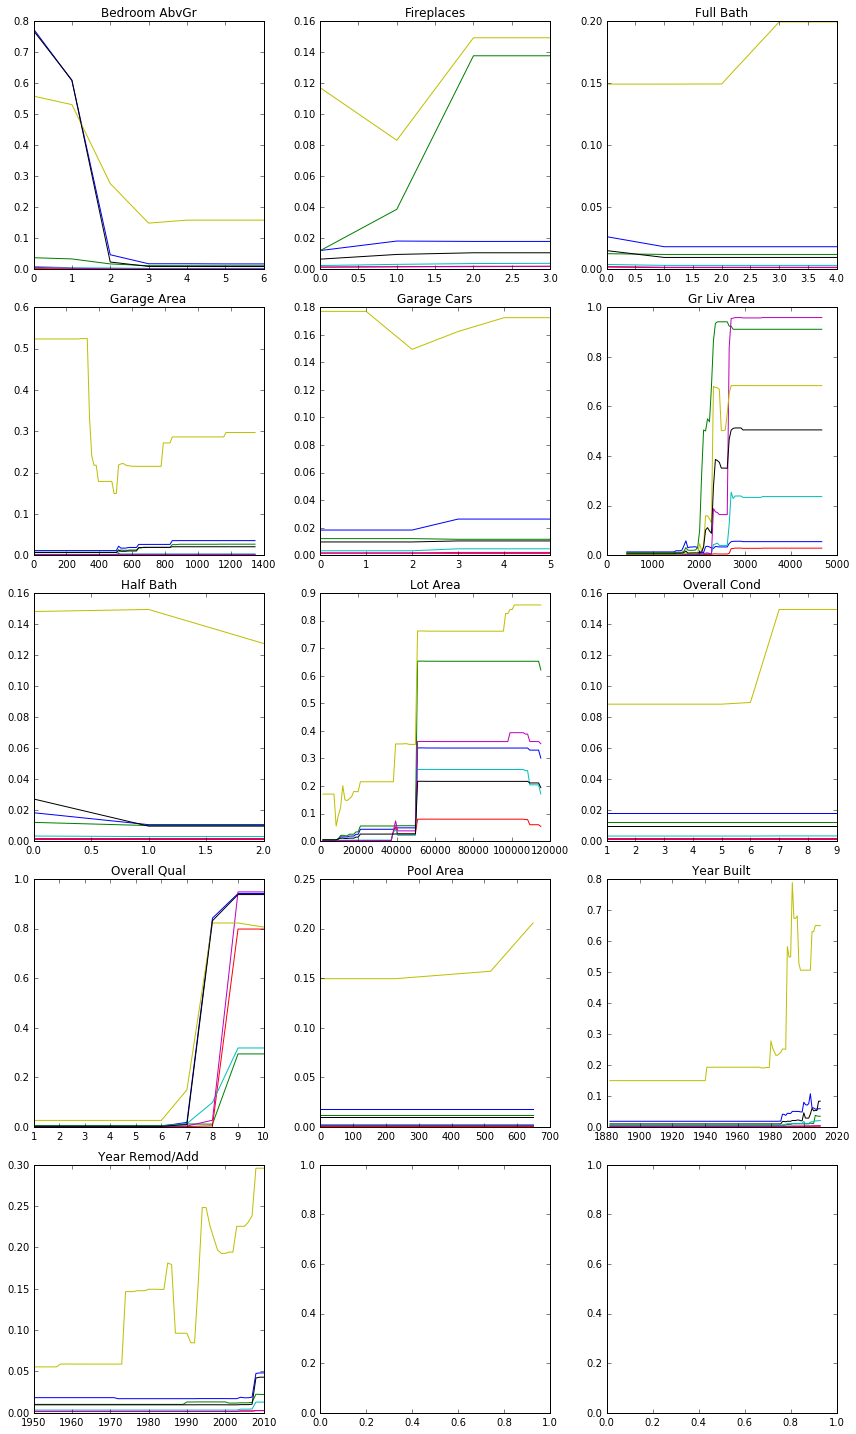

In [44]:
mli.insights.feature_dependence_plots(results, num_pts=7)

In [45]:
def path_between_points(data_row_1, data_row_2, model, tol=.001, verbose=True):
    column_names = data_row_1.index
    num_columns = len(column_names)
    
    dr_1 = data_row_1.values.reshape(1,-1)
    dr_2 = data_row_2.values.reshape(1,-1)
    column_list = list(range(num_columns))
    curr_pt = np.copy(dr_1)
    val1 = model.predict(dr_1)[0]
    val2 = model.predict(dr_2)[0]
    if verbose:
        print('Your initial point has a target value of {}'.format(val1))
        print('Your final point has a target value of {}'.format(val2))
    pt_list = [dr_1]
    val_list = [val1]
    curr_val = val1
    final_val = val2
    feat_list =[]
    move_list = []
    feat_val_change_list = []
    #for num_steps in range(4):
    while (((curr_val/final_val) >(1+tol)) or ((curr_val/final_val) <(1-tol))):
        biggest_move = 0
        best_column = -1
        best_val = curr_val
        for i in column_list:
            test_pt = np.copy(curr_pt)
            prev_feat_val = test_pt[0,i]
            subst_val = dr_2[0,i]
            test_pt[0,i] = subst_val
            test_val = model.predict(test_pt)[0]
            move_size = (test_val - curr_val)
            if(np.abs(move_size)>=np.abs(biggest_move)):
                biggest_move = move_size
                best_column = i
                best_val = test_val
                old_feat_val = prev_feat_val
                new_feat_val = subst_val
        subst_val = dr_2[0,best_column]
        curr_pt[0,best_column] = subst_val
        val_list.append(best_val)
        curr_val = best_val
        if verbose:
            print('Changing {} from {} to {}'.format(column_names[best_column],old_feat_val,new_feat_val))
            print('Changes your target by {} to {}'.format(biggest_move, best_val))
            if not (((curr_val/final_val) >(1+tol)) or ((curr_val/final_val) <(1-tol))):
                print('Tolerance of {} reached'.format(tol))
                print('Current value of {} is within {}% of {}'.format(curr_val,(100*tol),final_val))
        feat_list.append(column_names[best_column])
        column_list.remove(best_column)
        move_list.append(biggest_move)
        feat_val_change_list.append((old_feat_val, new_feat_val))
    return feat_list, feat_val_change_list, move_list, val_list
            

In [48]:
dr1 = X_test.iloc[33,:]
dr2 = X_test.iloc[52,:]


In [49]:
path_between_points(dr2, dr1, gbmodel1, tol=.03)

Your initial point has a target value of 144344.4646453612
Your final point has a target value of 94600.50097855767
Changing Overall Qual from 6.0 to 4.0
Changes your target by -13116.199335322832 to 131228.26531003838
Changing Year Built from 1962.0 to 1925.0
Changes your target by -13099.600002054882 to 118128.6653079835
Changing Overall Cond from 8.0 to 5.0
Changes your target by -12634.96265200009 to 105493.7026559834
Changing Year Remod/Add from 2001.0 to 1950.0
Changes your target by -8057.896489133389 to 97435.80616685002
Tolerance of 0.03 reached
Current value of 97435.80616685002 is within 3.0% of 94600.50097855767


(['Overall Qual', 'Year Built', 'Overall Cond', 'Year Remod/Add'],
 [(6.0, 4.0), (1962.0, 1925.0), (8.0, 5.0), (2001.0, 1950.0)],
 [-13116.199335322832,
  -13099.600002054882,
  -12634.962652000089,
  -8057.896489133389],
 [144344.46464536121,
  131228.26531003838,
  118128.66530798349,
  105493.7026559834,
  97435.806166850016])